In [22]:
%matplotlib inline

In [23]:
import numpy as np
from scipy.integrate import odeint, solve_ivp
from scipy import linalg as LA
import matplotlib.pyplot as plt
import math


In [24]:
class DoublePendulum():
  
    # input initial values
    def __init__(self, l_1 = 1.,l_2 = 1., m_1 = 1.,m_2 = 1., g = 1.
                ):
        self.l_1 = l_1
        self.l_2 = l_2
        self.m_1 = m_1
        self.m_2 = m_2
        self.g = g

    #the right side of the equation
    
    def dy_dt(self, t, y):
         
        #input for initial condition
        theta_1, theta_1_dot, theta_2, theta_2_dot = y  
        
        a_1 = self.l_2 / self.l_1 * self.m_2 / (self.m_1 + self.m_2) * np.cos(theta_1 - theta_2)
        a_2 = self.l_1 / self.l_2 * np.cos(theta_1 - theta_2)
        
        f_1 = (-self.l_2 / self.l_1 * self.m_2 / (self.m_1 + self.m_2) * 
               theta_2_dot**2 * np.sin(theta_1 - theta_2) - self.g / self.l_1 * np.sin(theta_1))
        f_2 = (self.l_1 / self.l_2 * theta_1_dot**2 * np.sin(theta_1 - theta_2) 
               - self.g / self.l_2 * np.sin(theta_2))
      
        theta_1_dots = (f_1 - a_1 * f_2) / (1 - a_1 * a_2)
        theta_2_dots = (-a_2 * f_1 + f_2) / (1 - a_1 * a_2)
        
        return theta_1_dot, theta_1_dots, theta_2_dot, theta_2_dots
    
    
    #solve the differentital equation
    def solve_ode(self, t_pts, theta_1i, theta_1i_dot, theta_2i, theta_2i_dot, 
                  abserr=1.0e-9, relerr=1.0e-9):
        """
        Solve the ODE given initial conditions.
        Specify smaller abserr and relerr to get more precision.
        """
        y = [theta_1i, theta_1i_dot, theta_2i, theta_2i_dot] 
        solution = solve_ivp(self.dy_dt, (t_pts[0], t_pts[-1]), 
                             y, t_eval = t_pts, 
                             atol = abserr, rtol = relerr)
        theta_1, theta_1_dot, theta_2, theta_2_dot = solution.y

        return theta_1, theta_1_dot, theta_2, theta_2_dot
    
    

In [25]:
def plot_y_vs_x(x, y, axis_labels=None, label=None, title=None, 
                color=None, linestyle=None, semilogy=False, loglog=False,
                ax=None):
    """
    Generic plotting function: return a figure axis with a plot of y vs. x,
    with line color and style, title, axis labels, and line label
    """
    if ax is None:        # if the axis object doesn't exist, make one
        ax = plt.gca()

    if (semilogy):
        line, = ax.semilogy(x, y, label=label, 
                            color=color, linestyle=linestyle)
    elif (loglog):
        line, = ax.loglog(x, y, label=label, 
                          color=color, linestyle=linestyle)
    else:
        line, = ax.plot(x, y, label=label, 
                    color=color, linestyle=linestyle)

    if label is not None:    # if a label if passed, show the legend
        ax.legend()
    if title is not None:    # set a title if one if passed
        ax.set_title(title)
    if axis_labels is not None:  # set x-axis and y-axis labels if passed  
        ax.set_xlabel(axis_labels[0])
        ax.set_ylabel(axis_labels[1])

    return ax, line

In [26]:
def start_stop_indices(t_pts, plot_start, plot_stop):
    start_index = (np.fabs(t_pts-plot_start)).argmin()  # index in t_pts array 
    stop_index = (np.fabs(t_pts-plot_stop)).argmin()  # index in t_pts array 
    return start_index, stop_index

## (a)

In [31]:
#input intial condition

l_1 = 1.
l_2 = 1.
m_1 = 1.
m_2 = 1.
g = 1.

t_start = 0
t_end = 50
delta_t = 0.01
t_pts = np.arange(t_start, t_end + delta_t, delta_t)  

theta_1i = 0
theta_1i_dot = 0
theta_2i = 0.05
theta_2i_dot = 0

p1 = DoublePendulum(l_1 = l_1, l_2 = l_2, m_1 = m_1, m_2 = m_2, g = g)

theta_1, theta_1_dot, theta_2, theta_2_dot = p1.solve_ode(t_pts, theta_1i, theta_1i_dot, theta_2i, theta_2i_dot)

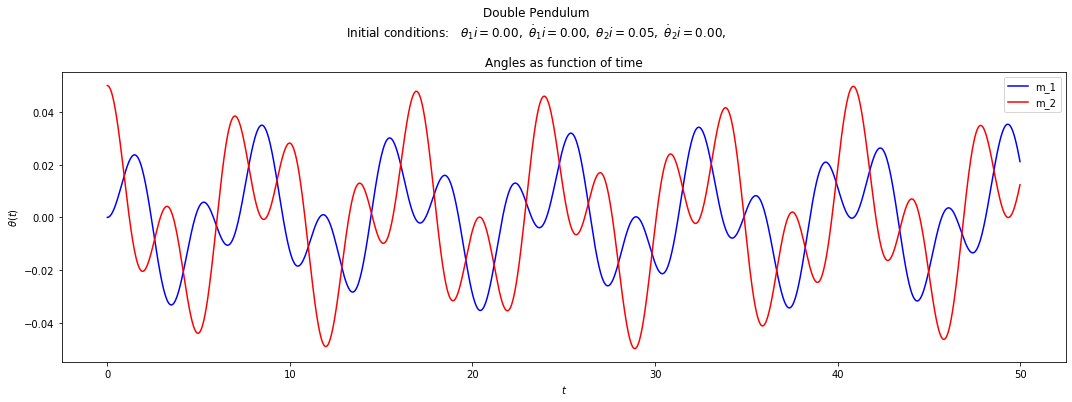

In [35]:
#Plotting

theta_vs_time_labels = (r'$t$', r'$\theta(t)$')



fig = plt.figure(figsize=(15,5))
overall_title = 'Double Pendulum' + \
                '\n' + \
                'Initial conditions:  ' + \
                rf' $\theta_1i = {theta_1i:.2f},$' + \
                rf' $\dot\theta_1i = {theta_1i_dot:.2f},$' + \
                rf' $\theta_2i = {theta_2i:.2f},$' + \
                rf' $\dot\theta_2i = {theta_2i_dot:.2f},$' + \
                '\n'     # \n means a new line (adds some space here)
fig.suptitle(overall_title, va='baseline')


ax_a = fig.add_subplot(1,1,1)                  

start, stop = start_stop_indices(t_pts, t_start, t_end)    
plot_y_vs_x(t_pts[start : stop], theta_1[start : stop], 
            axis_labels = theta_vs_time_labels, 
            color='blue',
            label='m_1', 
            title='Angles as function of time', 
            ax=ax_a)  

plot_y_vs_x(t_pts[start : stop], theta_2[start : stop], 
            axis_labels = theta_vs_time_labels, 
            color='red',
            label='m_2', 
            ax=ax_a)  

fig.tight_layout()
#fig.savefig('double_pendulum_Lagrange(1).pdf', bbox_inches='tight')  






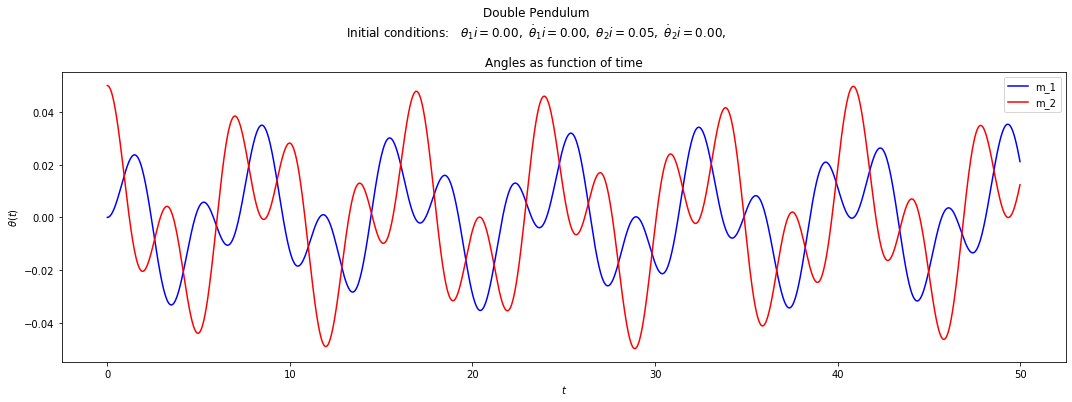

In [34]:
theta_1i = 0
theta_1i_dot = 0
theta_2i = 0.05
theta_2i_dot = 0

p2 = DoublePendulum(l_1 = l_1, l_2 = l_2, m_1 = m_1, m_2 = m_2, g = g)

theta_1, theta_1_dot, theta_2, theta_2_dot = p1.solve_ode(t_pts, theta_1i, theta_1i_dot, theta_2i, theta_2i_dot)

# start the plot!
fig = plt.figure(figsize=(15,5))
overall_title = 'Double Pendulum' + \
                '\n' + \
                'Initial conditions:  ' + \
                rf' $\theta_1i = {theta_1i:.2f},$' + \
                rf' $\dot\theta_1i = {theta_1i_dot:.2f},$' + \
                rf' $\theta_2i = {theta_2i:.2f},$' + \
                rf' $\dot\theta_2i = {theta_2i_dot:.2f},$' + \
                '\n'     # \n means a new line (adds some space here)
fig.suptitle(overall_title, va='baseline')


ax_a = fig.add_subplot(1,1,1)                  

start, stop = start_stop_indices(t_pts, t_start, t_end)    
plot_y_vs_x(t_pts[start : stop], theta_1[start : stop], 
            axis_labels = theta_vs_time_labels, 
            color='blue',
            label='m_1', 
            title='Angles as function of time', 
            ax=ax_a)  

plot_y_vs_x(t_pts[start : stop], theta_2[start : stop], 
            axis_labels = theta_vs_time_labels, 
            color='red',
            label='m_2', 
            ax=ax_a)  


fig.tight_layout()
fig.savefig('double_pendulum_Lagrange(2).pdf', bbox_inches='tight')  

# (b)

In [36]:
#input intial condition
alpha_1i = np.pi / 2
alpha_1i_dot = 0
alpha_2i = np.pi
alpha_2i_dot = 0
alpha_1, alpha_1_dot, alpha_2, alpha_2_dot = p1.solve_ode(t_pts, alpha_1i, alpha_1i_dot, alpha_2i, alpha_2i_dot)

beta_1i = np.pi / 2
beta_1i_dot = 0
beta_2i = np.pi - 0.00001
beta_2i_dot = 0
beta_1, beta_1_dot, beta_2, beta_2_dot = p1.solve_ode(t_pts, beta_1i, beta_1i_dot, beta_2i, beta_2i_dot)

delta_1= np.fabs(alpha_1 - beta_1)
delta_2= np.fabs(alpha_2 - beta_2)


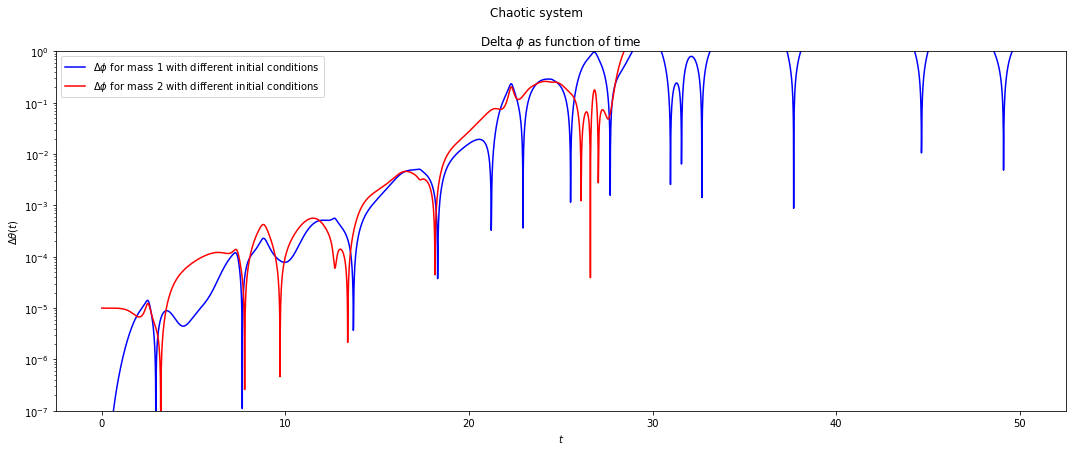

In [37]:
# start the plot!

delta_theta_vs_time_labels = (r'$t$', r'$\Delta\theta(t)$')

fig = plt.figure(figsize=(15,6))
overall_title = 'Chaotic system' + \
                '\n'     # \n means a new line (adds some space here)
fig.suptitle(overall_title, va='baseline')

# Delta phi plot 
ax_a = fig.add_subplot(1,1,1)                  

start, stop = start_stop_indices(t_pts, t_start, t_end)    
plot_y_vs_x(t_pts[start : stop], delta_1[start : stop], 
            axis_labels=delta_theta_vs_time_labels, 
            color='blue',
            label='$\Delta\phi$ for mass 1 with different initial conditions', 
            semilogy = True,
            title=r'Delta $\phi$ as function of time', 
            ax=ax_a)  

plot_y_vs_x(t_pts[start : stop], delta_2[start : stop], 
            axis_labels=delta_theta_vs_time_labels, 
            color='red',
            label='$\Delta\phi$ for mass 2 with different initial conditions', 
            semilogy = True,
            ax=ax_a)  

ax_a.set_ylim(1.e-7,1.)
fig.tight_layout()
fig.savefig('chaotic.pdf', bbox_inches='tight')  

# (e)

In [38]:
import ipywidgets as widgets
from ipywidgets import HBox, VBox, Layout, Tab, Label, Checkbox
from ipywidgets import FloatSlider, IntSlider, Play, Dropdown, HTMLMath 

from IPython.display import display
from time import sleep